In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [2]:
iris = load_iris(as_frame = True)
df = iris.frame.copy()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
median_sl = df['sepal length (cm)'].median()
df['sepal_length_cat'] = pd.cut(
    df['sepal length (cm)'],
    bins=[df['sepal length (cm)'].min(), median_sl, df['sepal length (cm)'].max()],
    labels=['short', 'long']
)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_length_cat
0,5.1,3.5,1.4,0.2,0,short
1,4.9,3.0,1.4,0.2,0,short
2,4.7,3.2,1.3,0.2,0,short
3,4.6,3.1,1.5,0.2,0,short
4,5.0,3.6,1.4,0.2,0,short
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,long
146,6.3,2.5,5.0,1.9,2,long
147,6.5,3.0,5.2,2.0,2,long
148,6.2,3.4,5.4,2.3,2,long


In [4]:
numeric_feature = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' ]
catogorical_features = ['sepal_length_cat']


In [5]:
x=df[numeric_feature+catogorical_features]
y=df['target']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numeric_feature] = scaler.fit_transform(x_train[numeric_feature])
x_test[numeric_feature] = scaler.transform(x_test[numeric_feature])



In [8]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_length_cat
8,-1.721568,-0.332101,-1.345722,-1.323276,short
106,-1.124492,-1.227655,0.414505,0.651763,short
76,1.144395,-0.555990,0.584850,0.256755,long
9,-1.124492,0.115676,-1.288941,-1.454945,short
89,-0.408002,-1.227655,0.130598,0.125086,short
...,...,...,...,...,...
37,-1.124492,1.235118,-1.345722,-1.454945,short
2,-1.363322,0.339564,-1.402504,-1.323276,short
33,-0.408002,2.578448,-1.345722,-1.323276,short
52,1.263810,0.115676,0.641631,0.388424,long


In [9]:
# perform onehotencoding using pd.get_dummies
x_train = pd.get_dummies(x_train, columns=['sepal_length_cat'],dtype='int')
x_test=pd.get_dummies(x_test, columns=['sepal_length_cat'],dtype='int')

In [10]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_length_cat_short,sepal_length_cat_long
8,-1.721568,-0.332101,-1.345722,-1.323276,1,0
106,-1.124492,-1.227655,0.414505,0.651763,1,0
76,1.144395,-0.555990,0.584850,0.256755,0,1
9,-1.124492,0.115676,-1.288941,-1.454945,1,0
89,-0.408002,-1.227655,0.130598,0.125086,1,0
...,...,...,...,...,...,...
37,-1.124492,1.235118,-1.345722,-1.454945,1,0
2,-1.363322,0.339564,-1.402504,-1.323276,1,0
33,-0.408002,2.578448,-1.345722,-1.323276,1,0
52,1.263810,0.115676,0.641631,0.388424,0,1


In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text,plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)



DecisionTreeClassifier(random_state=42)

In [12]:
feature_name=x_train.columns
feature_name

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'sepal_length_cat_short', 'sepal_length_cat_long'],
      dtype='object')

In [13]:
rules=export_text(clf, feature_names=feature_name)
print("Decision Rules are : \n",rules)

Decision Rules are : 
 |--- petal width (cm) <= -0.53
|   |--- class: 0
|--- petal width (cm) >  -0.53
|   |--- petal width (cm) <= 0.59
|   |   |--- petal length (cm) <= 0.67
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.67
|   |   |   |--- sepal width (cm) <= -0.67
|   |   |   |   |--- petal width (cm) <= 0.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  0.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  -0.67
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  0.59
|   |   |--- petal length (cm) <= 0.61
|   |   |   |--- sepal width (cm) <= -0.11
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  -0.11
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.61
|   |   |   |--- class: 2



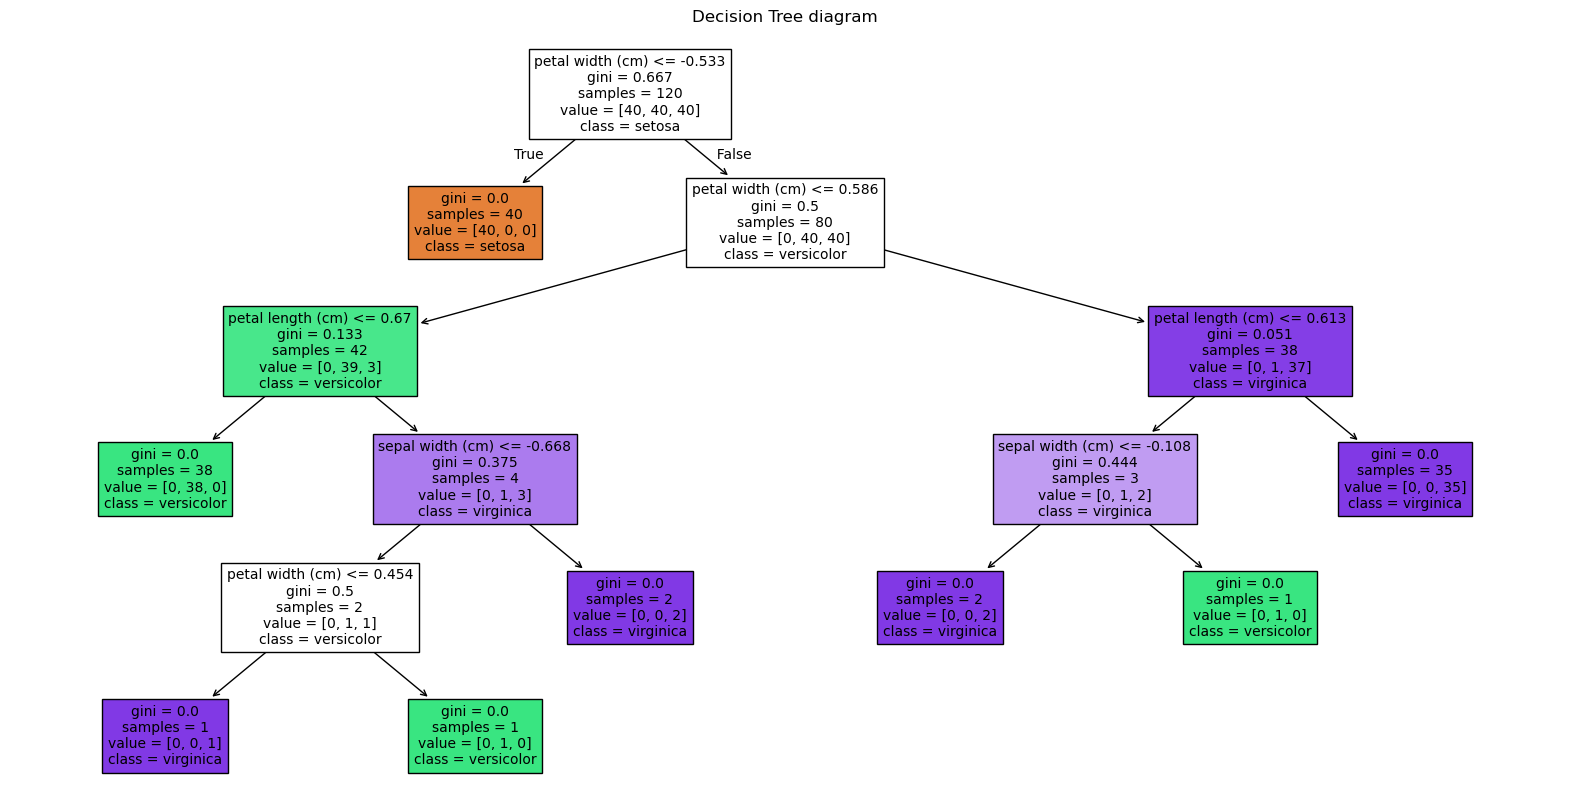

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_name, filled=True, fontsize=10,class_names=iris.target_names)
plt.title("Decision Tree diagram")
plt.show()


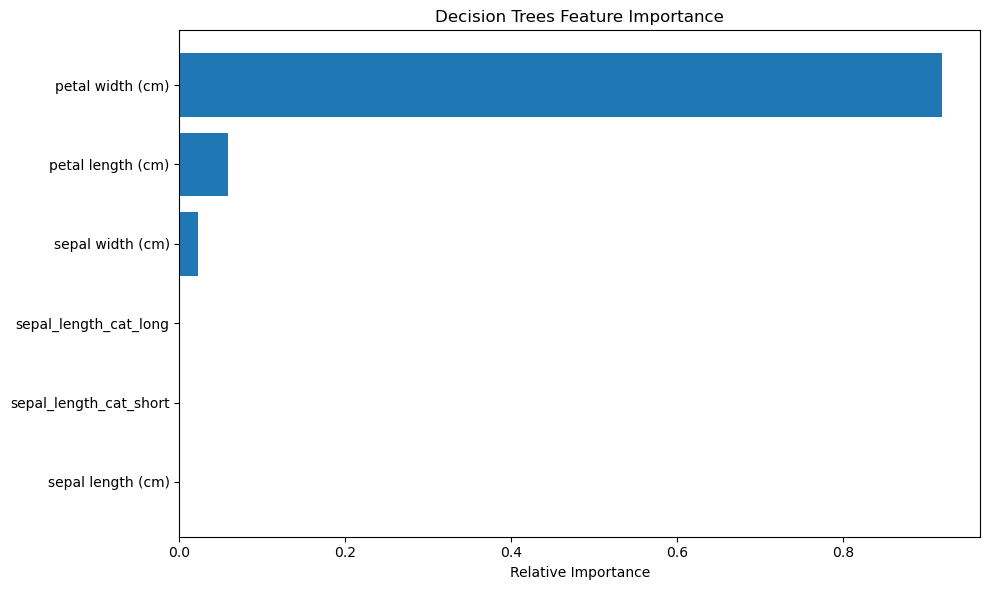

In [15]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::1]
names_sorted = [feature_name[i] for i in indices]
importances_sorted = importances[indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances_sorted)), importances_sorted, align="center")
plt.yticks(range(len(importances_sorted)), names_sorted)
plt.xlabel("Relative Importance")
plt.title("Decision Trees Feature Importance")
plt.tight_layout()
plt.show()

In [16]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']

}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)#n_jobs=-1 will use all processors



In [17]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy')

In [18]:
best_clf = grid.best_estimator_


In [19]:
rules=export_text(best_clf, feature_names=feature_name)
print("Best Decision Rules are : \n",rules)

Best Decision Rules are : 
 |--- petal width (cm) <= -0.53
|   |--- class: 0
|--- petal width (cm) >  -0.53
|   |--- petal width (cm) <= 0.59
|   |   |--- petal length (cm) <= 0.67
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.67
|   |   |   |--- sepal width (cm) <= -0.67
|   |   |   |   |--- petal width (cm) <= 0.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  0.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  -0.67
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  0.59
|   |   |--- petal length (cm) <= 0.61
|   |   |   |--- sepal width (cm) <= -0.11
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  -0.11
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  0.61
|   |   |   |--- class: 2



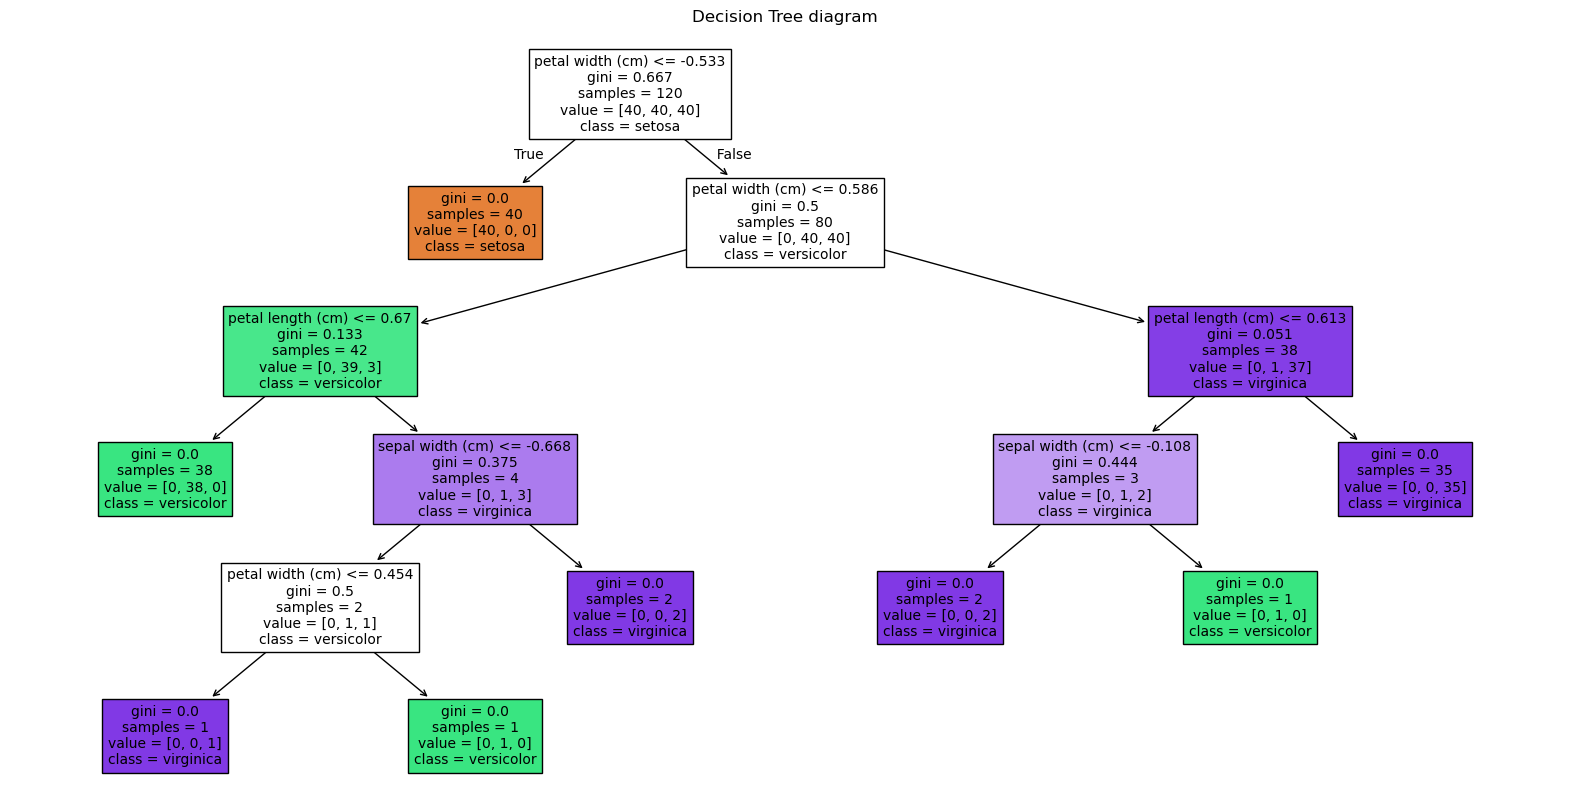

In [20]:
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=feature_name, filled=True, fontsize=10,class_names=iris.target_names)
plt.title("Decision Tree diagram")
plt.show()


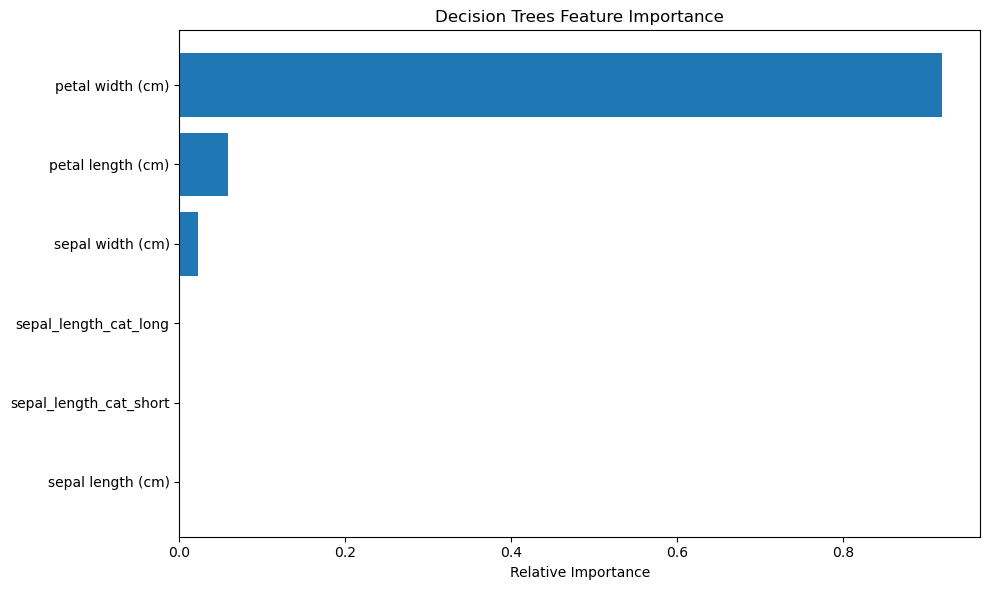

In [21]:
# Feature Importance
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::1]
names_sorted = [feature_name[i] for i in indices]
importances_sorted = importances[indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances_sorted)), importances_sorted, align="center")
plt.yticks(range(len(importances_sorted)), names_sorted)
plt.xlabel("Relative Importance")
plt.title("Decision Trees Feature Importance")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,auc
y_pred = best_clf.predict(x_test)
y_pred_proba = best_clf.predict_proba(x_test)
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred,average='macro'))
print("precision_score: ",precision_score(y_test,y_pred,average='macro'))
print("f1_score: ",f1_score(y_test,y_pred,average='macro'))
print("roc_auc_score: ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))





accuracy_score:  0.9666666666666667
recall_score:  0.9666666666666667
precision_score:  0.9696969696969697
f1_score:  0.9665831244778612
roc_auc_score:  0.975


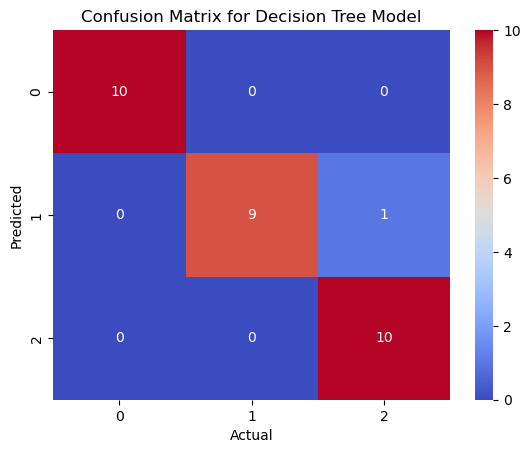

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()